# Geopandas Basics

In [1]:
import geopandas as gpd

## Open GeoJson

In [2]:
gdf = gpd.read_file("./data/eb-buildings.geojson")

print(len(gdf))
gdf.head()

480


,full_id,osm_id,osm_type,building,shelter_type,building:material,covered,bicycle_parking,maxstay,capacity,...,wikidata,religion,name,denomination,amenity,addr:street,addr:postcode,addr:housenumber,addr:city,geometry
0,w29115053,29115053,way,commercial,None,None,None,None,None,None,...,None,None,None,None,None,Seetalstrasse,6020,11,Emmenbrücke,"MULTIPOLYGON (((8.28403 47.07038, 8.28377 47.0..."
1,w29199824,29199824,way,apartments,None,None,None,None,None,None,...,None,None,None,None,None,Stauffacherstrasse,None,1,None,"MULTIPOLYGON (((8.28628 47.0732, 8.28627 47.07..."
2,w87342078,87342078,way,yes,None,None,None,None,None,None,...,None,None,None,None,None,Seetalstrasse,6020,18,Emmenbrücke,"MULTIPOLYGON (((8.28608 47.07115, 8.28609 47.0..."
3,w87342080,87342080,way,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((8.28102 47.07165, 8.28162 47.0..."
4,w87342082,87342082,way,industrial,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((8.27836 47.0705, 8.27852 47.07..."


In [3]:
# check the crs
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
# set the crs to WGS84
gdf = gdf.set_crs(epsg=4326)

<Axes: >

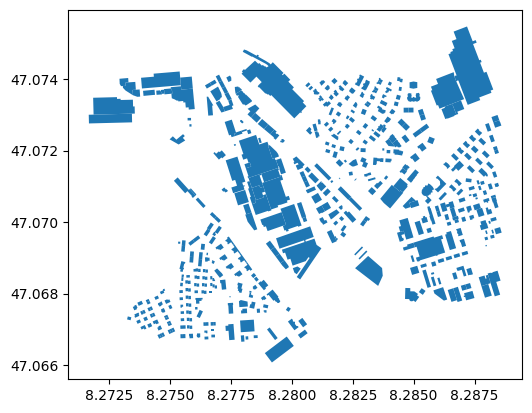

In [ ]:
# create a basic plot using mathplotlib as a backbone
gdf.plot()

## Open Shapefiles

In [5]:
# basically the same principle
gdf2 = gpd.read_file("./data/eb-highways.shp")
gdf2.head()

,full_id,osm_id,osm_type,highway,change_lan,destinatio,oneway_bic,crossing_m,crossing_1,crossing_i,...,turn_lan_2,surface,sidewalk_b,ref,oneway,name,maxspeed,lanes,foot,geometry
0,w10968797,10968797,way,primary,None,None,None,None,None,None,...,merge_to_right|through,asphalt,no,26,yes,Seetalstrasse,60,2,no,"LINESTRING (8.28569 47.07166, 8.28563 47.07159..."
1,w10968801,10968801,way,primary,None,None,None,None,None,None,...,through|through,asphalt,None,2,yes,Gerliswilstrasse,50,2,None,"LINESTRING (8.28075 47.0704, 8.28079 47.07028,..."
2,w24980806,24980806,way,tertiary,None,None,None,None,None,None,...,None,asphalt,separate,None,None,Rüeggisingerstrasse,50,2,None,"LINESTRING (8.27755 47.0736, 8.27758 47.07365,..."
3,w25455062,25455062,way,residential,None,None,None,None,None,None,...,None,paved,None,None,None,Hochdorferstrasse,50,None,None,"LINESTRING (8.28381 47.07034, 8.28353 47.07056..."
4,w25455063,25455063,way,residential,None,None,None,None,None,None,...,None,None,None,None,None,None,None,2,None,"LINESTRING (8.27883 47.07347, 8.27873 47.07342)"


## Inspecting the Data

In [14]:
list(gdf2.columns)

['full_id',
 'osm_id',
 'osm_type',
 'highway',
 'change_lan',
 'destinatio',
 'oneway_bic',
 'crossing_m',
 'crossing_1',
 'crossing_i',
 'tactile_pa',
 'local_ref',
 'shelter',
 'public_tra',
 'operator',
 'old_name',
 'network_wi',
 'network',
 'bin',
 'bench',
 'lanes_bus_',
 'bus_backwa',
 'bicycle_ba',
 'access_bac',
 'ramp_wheel',
 'lanes_bu_1',
 'bus_lanes_',
 'access_lan',
 'trail_visi',
 'shoulder',
 'maxweight_',
 'crossing',
 'destinat_1',
 'horse',
 'turn_forwa',
 'turn_backw',
 'turn',
 'destinat_2',
 'destinat_3',
 'psv_lanes_',
 'bus_bay',
 'change_l_1',
 'level',
 'turn_bus_l',
 'smoothness',
 'change_l_2',
 'lanes_both',
 'maxheight',
 'traffic_si',
 'man_made',
 'step_count',
 'ramp',
 'incline',
 'handrail',
 'sac_scale',
 'vehicle',
 'service',
 'trolleybus',
 'bus',
 'motor_vehi',
 'turn_lanes',
 'turn_lan_1',
 'tracktype',
 'motorcycle',
 'motorcar',
 'width_lane',
 'width_la_1',
 'loc_ref',
 'cycleway_r',
 'cycleway_l',
 'bicycle_la',
 'bicycle__1',
 'oneway_psv

In [15]:
gdf2["surface"].unique()

array(['asphalt', 'paved', None, 'gravel', 'pebblestone', 'paving_stones',
       'unpaved', 'concrete', 'ground'], dtype=object)

## Filtering

In [ ]:
asphalt = gdf2[gdf2["surface"] == 'asphalt']

print(len(asphalt))
asphalt.head()

342


,full_id,osm_id,osm_type,highway,change_lan,destinatio,oneway_bic,crossing_m,crossing_1,crossing_i,...,turn_lan_2,surface,sidewalk_b,ref,oneway,name,maxspeed,lanes,foot,geometry
0,w10968797,10968797,way,primary,None,None,None,None,None,None,...,merge_to_right|through,asphalt,no,26,yes,Seetalstrasse,60,2,no,"LINESTRING (8.28569 47.07166, 8.28563 47.07159..."
1,w10968801,10968801,way,primary,None,None,None,None,None,None,...,through|through,asphalt,None,2,yes,Gerliswilstrasse,50,2,None,"LINESTRING (8.28075 47.0704, 8.28079 47.07028,..."
2,w24980806,24980806,way,tertiary,None,None,None,None,None,None,...,None,asphalt,separate,None,None,Rüeggisingerstrasse,50,2,None,"LINESTRING (8.27755 47.0736, 8.27758 47.07365,..."
5,w25455064,25455064,way,residential,None,None,None,None,None,None,...,None,asphalt,None,None,None,Oberhofstrasse,30,None,None,"LINESTRING (8.28332 47.0721, 8.28348 47.07219,..."
9,w27546896,27546896,way,residential,None,None,None,None,None,None,...,None,asphalt,no,None,None,Herdschwandstrasse,30,None,None,"LINESTRING (8.28216 47.07217, 8.28225 47.07212..."


## Export

In [18]:
# GeoJSON
asphalt.to_file("export/asphalt-highways.geojson", driver="GeoJSON")

# ESRI Shapefile (fields are truncated to 10 chars; avoid long names)
asphalt.to_file("export/asphalt-highways.shp")